<h1><center>LUBRICATION OIL MODEL PREDICTION

<h2>1. Feature Engineering</h2>

In [1]:
import warnings
# Ignoring all warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

dataset=pd.read_csv("Lubricating_Oil_Parameters.csv")
dataset.head()

,id,icm_isocode,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,...,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
0,Sequential id,ISO Cleanliness Code 4406:1999,relative humidity of the oil (%),oil flow (ml/min),temperature of the sensor (C),disaggregated ISO Cleanliness Code 4406:1999,disaggregated ISO Cleanliness Code 4406:1999,disaggregated ISO Cleanliness Code 4406:1999,particle counter 4µ,particle counter 6µ,...,kinematic viscosity (cSt),dynamic viscosity (cP),density (g/cm3),dielectric,oil temperature (C),temperature of the sensor (C),param A used for oil degradation calculation,param B used for oil degradation calculation,param C used for oil degradation calculation,oil degradation
1,1,15/13/4,11.38,140,32.88,15,13,4,19932,4662,...,654.309,1298.497,1.985,7.937,30.312,27,27501,36368,20349,28.05
2,2,2005-10-15,11.38,284,32.93,15,10,5,21560,857,...,654.309,1298.497,1.985,7.937,30.312,27,27477,36334,20345,28.11
3,3,2004-12-15,11.38,283,32.97,15,12,4,18156,2235,...,654.309,1298.497,1.985,7.937,30.437,27,27477,36333,20342,28.11
4,4,2004-11-15,11.3,339,33.02,15,11,4,18512,1305,...,654.309,1298.497,1.985,7.937,30.5,27,27472,36338,20353,28.12


In [2]:
#deleting 1st row dataset[0] as it contains definition of feature which is causing DataType warning
dataset = dataset.drop(0).reset_index(drop=True)


In [3]:
# Dropping the 'id' column
dataset=dataset.drop('id', axis=1)
dataset.head()

,icm_isocode,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
0,15/13/4,11.38,140,32.88,15,13,4,19932,4662,10,654.309,1298.497,1.985,7.937,30.312,27,27501,36368,20349,28.05
1,2005-10-15,11.38,284,32.93,15,10,5,21560,857,30,654.309,1298.497,1.985,7.937,30.312,27,27477,36334,20345,28.11
2,2004-12-15,11.38,283,32.97,15,12,4,18156,2235,15,654.309,1298.497,1.985,7.937,30.437,27,27477,36333,20342,28.11
3,2004-11-15,11.3,339,33.02,15,11,4,18512,1305,9,654.309,1298.497,1.985,7.937,30.5,27,27472,36338,20353,28.12
4,2006-12-16,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,1298.497,1.985,7.937,30.5,27,27472,36338,20353,28.12


In [4]:
dataset.shape

(258645, 20)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258645 entries, 0 to 258644
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   icm_isocode     258645 non-null  object
 1   icm_rh          258645 non-null  object
 2   icm_flow        199253 non-null  object
 3   icm_temp        258645 non-null  object
 4   icm_iso4        258645 non-null  object
 5   icm_iso6        258645 non-null  object
 6   icm_iso14       258645 non-null  object
 7   icm_pc4         258645 non-null  object
 8   icm_pc6         258645 non-null  object
 9   icm_pc14        258645 non-null  object
 10  fps_vcst        245577 non-null  object
 11  fps_v           245577 non-null  object
 12  fps_density     245573 non-null  object
 13  fps_dielectric  245585 non-null  object
 14  fps_temp        258642 non-null  object
 15  oh_temp         255948 non-null  object
 16  oh_parama       258645 non-null  object
 17  oh_paramb       258645 non-nu

***ObservatioN:*** All feature are in Dtype: object which we will convert it into numeric except date feature

In [6]:
# Excluding the 'icm_isocode' column
exclude_col = ['icm_isocode']

# Drop the 'icm_isocode' column
dataset.drop(columns=exclude_col, inplace=True)

# Converting remaining columns to numeric and handling non-numeric entries
for col in dataset.columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')


In [7]:
dataset.head()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
0,11.38,140.0,32.88,15,13,4,19932,4662,10,654.309,1298.497,1.985,7.937,30.312,27.0,27501,36368,20349,28.05
1,11.38,284.0,32.93,15,10,5,21560,857,30,654.309,1298.497,1.985,7.937,30.312,27.0,27477,36334,20345,28.11
2,11.38,283.0,32.97,15,12,4,18156,2235,15,654.309,1298.497,1.985,7.937,30.437,27.0,27477,36333,20342,28.11
3,11.30,339.0,33.02,15,11,4,18512,1305,9,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12
4,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258645 entries, 0 to 258644
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   icm_rh          258645 non-null  float64
 1   icm_flow        199253 non-null  float64
 2   icm_temp        258645 non-null  float64
 3   icm_iso4        258645 non-null  int64  
 4   icm_iso6        258645 non-null  int64  
 5   icm_iso14       258645 non-null  int64  
 6   icm_pc4         258645 non-null  int64  
 7   icm_pc6         258645 non-null  int64  
 8   icm_pc14        258645 non-null  int64  
 9   fps_vcst        245577 non-null  float64
 10  fps_v           245577 non-null  float64
 11  fps_density     245573 non-null  float64
 12  fps_dielectric  245585 non-null  float64
 13  fps_temp        258642 non-null  float64
 14  oh_temp         255948 non-null  float64
 15  oh_parama       258645 non-null  int64  
 16  oh_paramb       258645 non-null  int64  
 17  oh_paramc 

In [9]:
#see distribution of our target variable: 
dataset['oh_od'].value_counts()

oh_od
29.29    836
29.30    802
29.32    801
29.26    786
29.25    784
        ... 
18.86      1
18.84      1
25.50      1
25.31      1
26.49      1
Name: count, Length: 1384, dtype: int64

In [10]:
# Saving the dropped dataset to a CSV file
dataset.to_csv('final_lubricant.csv', index=False)

<h3>1.1 Exploring Continious Feature</h3>


In [11]:
from scipy import stats

dataset=pd.read_csv("final_lubricant.csv")
dataset.head()

# Dropping all categorical features focussing on continuous features
category=["icm_iso4","icm_iso6","icm_iso14"]
dataset.drop(category, axis=1, inplace=True)

In [12]:
#General distribution of categorical features
dataset.describe()

,icm_rh,icm_flow,icm_temp,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
count,258645.000000,199253.000000,258645.000000,258645.000000,258645.000000,258645.000000,245577.000000,245577.000000,245573.000000,245585.000000,258642.000000,255948.000000,258645.000000,258645.000000,258645.000000,258645.000000
mean,8.971277,348.364702,40.023092,11364.393439,1346.218272,25.731833,115.208557,90.217048,0.780033,2.170328,38.361181,34.424274,27637.901108,36908.712161,20951.300860,27.399233
std,2.827217,104.029956,5.741388,6643.810803,1787.387180,186.142411,46.654985,45.393785,0.041134,0.190720,6.320784,6.503074,1284.871532,2003.071751,1456.821536,3.661100
min,3.400000,11.000000,25.970000,2287.000000,77.000000,0.000000,69.748000,55.757000,0.041000,2.131000,21.250000,15.000000,25764.000000,34196.000000,18951.000000,18.070000
25%,6.860000,275.000000,34.680000,7403.000000,569.000000,0.000000,89.598000,70.497000,0.773000,2.149000,32.562000,28.000000,26760.000000,35515.000000,19903.000000,26.910000
50%,8.970000,340.000000,40.880000,9956.000000,1010.000000,9.000000,103.941000,81.477000,0.782000,2.161000,39.344000,35.000000,27118.000000,36173.000000,20458.000000,28.850000
75%,10.600000,416.000000,45.000000,13960.000000,1697.000000,25.000000,139.064000,107.437000,0.786000,2.181000,43.687000,40.000000,27882.000000,37276.000000,21356.000000,29.890000
max,18.220000,971.000000,50.520000,699017.000000,350172.000000,56221.000000,15542.953000,1298.497000,1.985000,7.937000,49.875000,46.000000,30951.000000,41913.000000,24562.000000,32.530000


***ObservatioN:*** Variation between min, mean and max in icm_pc14 seems irregular that need to be studied for outliers

In [13]:
dataset.corr()

,icm_rh,icm_flow,icm_temp,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
icm_rh,1.000000,0.104853,0.232821,-0.123482,-0.069480,-0.008849,-0.137553,-0.090933,0.043601,-0.001653,0.240730,0.242379,0.404838,0.400966,0.399034,-0.404254
icm_flow,0.104853,1.000000,0.541678,-0.344759,-0.187245,-0.026721,-0.328695,-0.257774,0.094365,-0.066475,0.541555,0.537180,0.353140,0.390765,0.417867,-0.369688
icm_temp,0.232821,0.541678,1.000000,-0.562511,-0.267815,-0.027475,-0.637394,-0.506387,0.172815,-0.136388,0.999594,0.997848,0.701927,0.763718,0.807494,-0.729009
icm_pc4,-0.123482,-0.344759,-0.562511,1.000000,0.770726,0.180682,0.399696,0.333149,-0.084246,0.111217,-0.563780,-0.560818,-0.282683,-0.328636,-0.363353,0.302629
icm_pc6,-0.069480,-0.187245,-0.267815,0.770726,1.000000,0.321911,0.194439,0.163358,-0.039219,0.056312,-0.268368,-0.266536,-0.117021,-0.140542,-0.158554,0.127205
icm_pc14,-0.008849,-0.026721,-0.027475,0.180682,0.321911,1.000000,0.021070,0.017903,-0.005073,0.005995,-0.027606,-0.026945,0.001337,-0.002300,-0.005181,0.000210
fps_vcst,-0.137553,-0.328695,-0.637394,0.399696,0.194439,0.021070,1.000000,0.654650,0.189704,0.436017,-0.637858,-0.634074,-0.367773,-0.413760,-0.448264,0.387785
fps_v,-0.090933,-0.257774,-0.506387,0.333149,0.163358,0.017903,0.654650,1.000000,0.731015,0.915945,-0.507021,-0.502989,-0.287724,-0.324521,-0.352762,0.303804
fps_density,0.043601,0.094365,0.172815,-0.084246,-0.039219,-0.005073,0.189704,0.731015,1.000000,0.940975,0.172191,0.172083,0.075206,0.089928,0.100457,-0.081461
fps_dielectric,-0.001653,-0.066475,-0.136388,0.111217,0.056312,0.005995,0.436017,0.915945,0.940975,1.000000,-0.137063,-0.135007,-0.071070,-0.081467,-0.090174,0.075689


***ObservatioN1:*** oh_parama, oh_paramb, and oh_paramc are strongly negatively correlated with our target feature: oh_od

***ObservatioN2:*** fps_density, icm_temp, oh_temp, fps_temp also showed negative correlation with oh_od with around -0.7

***ObservatioN2:*** Other variable remaining moderate or weak correlation

<h3>1.2 Exploring Categorical Feature</h3>


In [14]:
dataset=pd.read_csv("final_lubricant.csv")

cont_feature=['icm_rh', 'icm_flow', 'icm_temp', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_temp', 'oh_parama', 'oh_paramb', 'oh_paramc', 'oh_od']
dataset.drop(cont_feature, axis=1, inplace=True)
dataset.head()

,icm_iso4,icm_iso6,icm_iso14
0,15,13,4
1,15,10,5
2,15,12,4
3,15,11,4
4,16,12,6


In [15]:
# Explore the number of unique values for each feature
for col in dataset.columns:
    print('{}: {} unique values'.format(col, dataset[col].nunique()))

icm_iso4: 9 unique values
icm_iso6: 13 unique values
icm_iso14: 17 unique values


***ObservatioN:*** except icm_isocode i.e. date , others are categorical variables

<h3>1.3 Treating Missing Values

In [16]:
dataset=pd.read_csv("final_lubricant.csv")
# Checking for missing values
print(dataset.isnull().sum())

icm_rh                0
icm_flow          59392
icm_temp              0
icm_iso4              0
icm_iso6              0
icm_iso14             0
icm_pc4               0
icm_pc6               0
icm_pc14              0
fps_vcst          13068
fps_v             13068
fps_density       13072
fps_dielectric    13060
fps_temp              3
oh_temp            2697
oh_parama             0
oh_paramb             0
oh_paramc             0
oh_od                 0
dtype: int64


<Axes: >

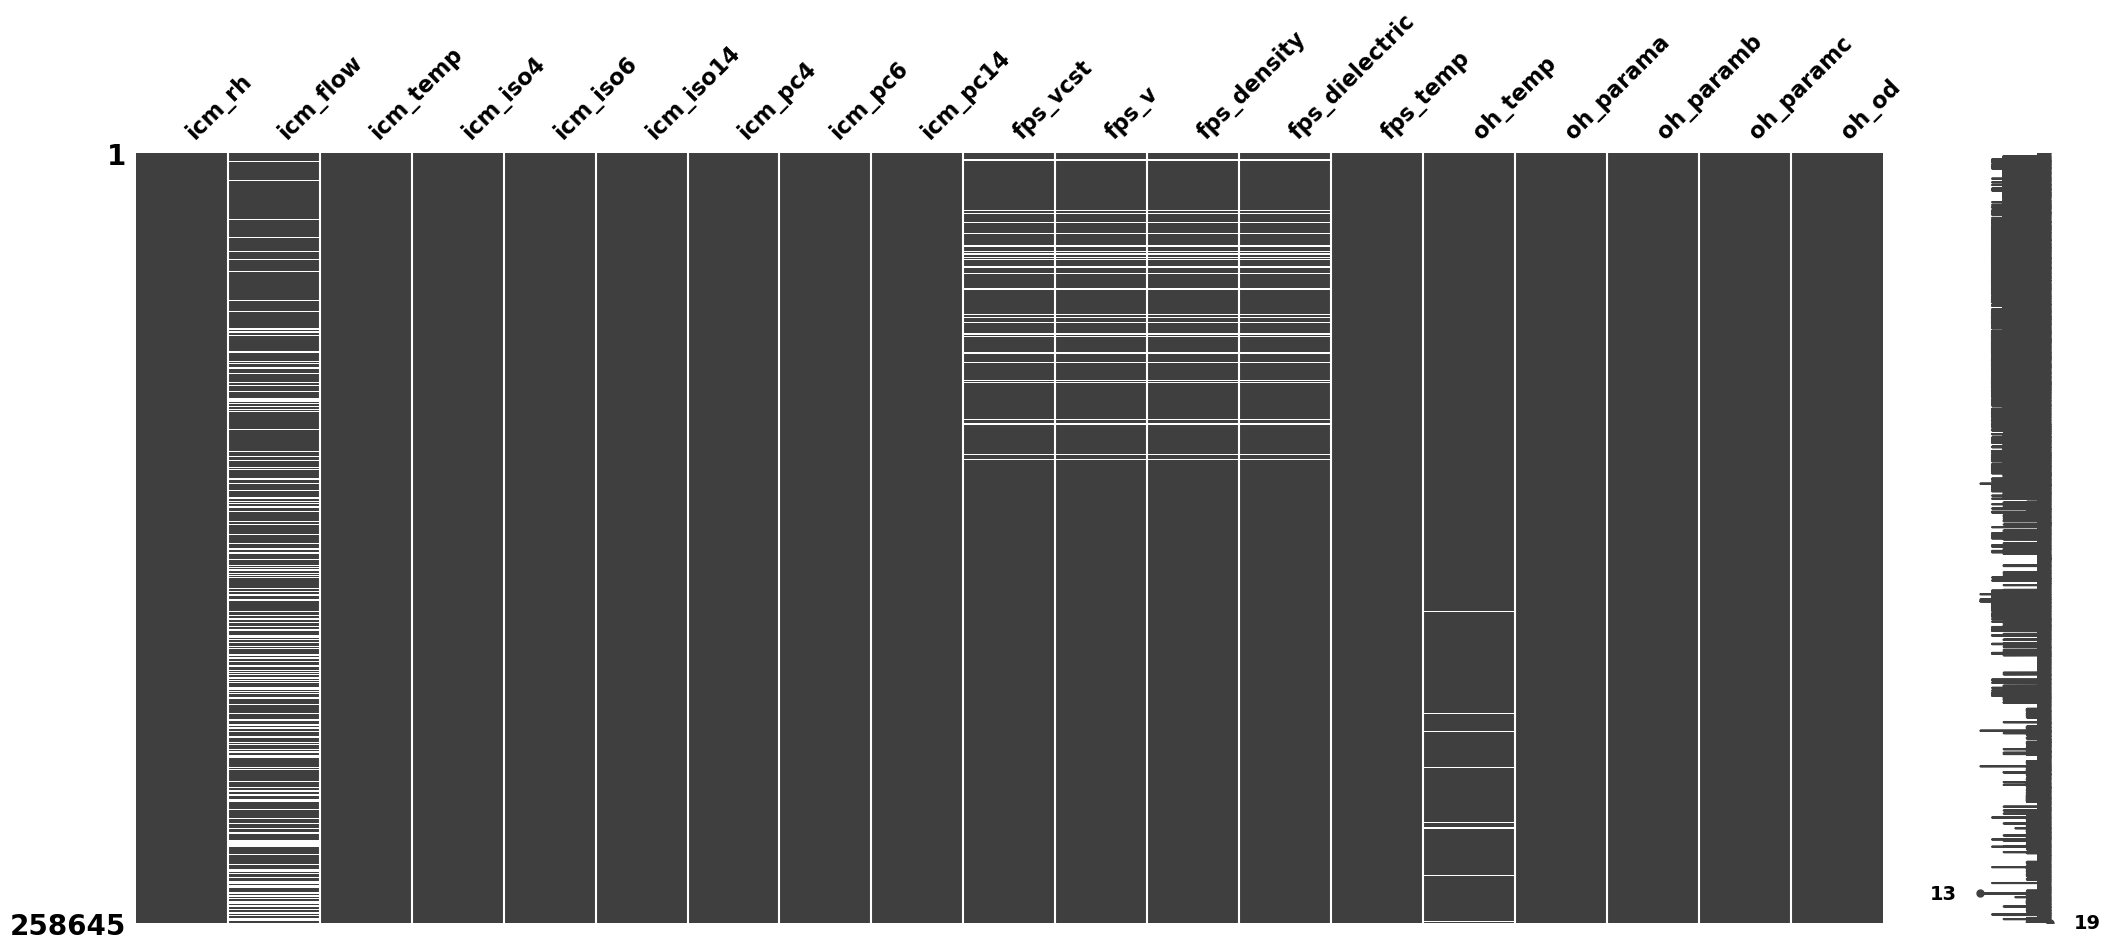

In [17]:
!pip install missingno

import missingno as msno
# Checking how missing data are distibuted
msno.matrix(dataset)

***ObservatioN:*** We can see fps_vcst, fps_v, fps_density, and fps_dielectric are missing at once, so, we will explore below if they follow any pattern in data or missing randomly.

In [18]:
#Checking if values are missing in random or not in each column
dataset.groupby(dataset['icm_flow'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
icm_flow,,,,,,,,,,,,,,,,,,,
False,8.897698,348.364702,39.341706,13.936960,10.586857,3.116872,12039.854000,1446.492008,27.617913,119.038332,93.251204,0.779227,2.174201,37.608846,33.671262,27582.230712,36799.974992,20860.448525,27.574991
True,9.218123,NaN,42.309061,13.583092,10.130186,2.752711,9098.304688,1009.811978,19.404263,102.807343,80.391912,0.782642,2.157787,40.885194,37.007513,27824.668575,37273.512258,21256.099492,26.809585


In [19]:
dataset.groupby(dataset['fps_vcst'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
fps_vcst,,,,,,,,,,,,,,,,,,,
False,8.960081,351.829480,40.351727,13.827219,10.44801,3.019920,11130.278210,1316.737561,25.352867,115.208557,90.217219,0.780033,2.170327,38.721546,34.793939,27670.966939,36970.555459,21002.341750,27.296783
True,9.181663,292.422597,33.847303,14.390955,11.12060,3.283747,15763.943144,1900.226890,32.853459,NaN,79.752000,0.768375,2.176897,31.589197,27.545963,27016.520049,35746.538032,19992.128176,29.324484


In [20]:
dataset.groupby(dataset['fps_v'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
fps_v,,,,,,,,,,,,,,,,,,,
False,8.960061,351.829438,40.351699,13.827223,10.44801,3.019912,11130.291640,1316.736144,25.352895,115.208895,90.217048,0.780033,2.170327,38.721516,34.793910,27670.968564,36970.556428,21002.340663,27.296780
True,9.182038,292.418158,33.847841,14.390878,11.12060,3.283900,15763.690771,1900.253520,32.852923,94.475750,NaN,0.768313,2.176345,31.589761,27.546499,27016.489516,35746.519819,19992.148607,29.324544


In [21]:
dataset.groupby(dataset['fps_density'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
fps_density,,,,,,,,,,,,,,,,,,,
False,8.960062,351.827414,40.351594,13.827216,10.448034,3.019949,11130.260607,1316.753625,25.353076,115.20785,90.21658,0.780033,2.170328,38.72140,34.793787,27670.984917,36970.574135,21002.347787,27.296740
True,9.181956,292.476387,33.851788,14.390835,11.119951,3.283124,15762.855952,1899.746558,32.847231,123.88455,95.96400,NaN,2.167952,31.59413,27.551003,27016.382573,35746.561735,19992.323898,29.324677


In [22]:
dataset.groupby(dataset['fps_dielectric'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
fps_dielectric,,,,,,,,,,,,,,,,,,,
False,8.96013,351.829247,40.351631,13.827241,10.448061,3.019961,11130.360486,1316.791465,25.353083,115.206860,90.215845,0.780033,2.170328,38.721442,34.793839,27671.009378,36970.61167,21002.374766,27.296670
True,9.18088,292.390563,33.845126,14.390888,11.120061,3.283155,15765.234380,1899.570674,32.853982,135.054238,104.286524,0.774667,NaN,31.586792,27.543385,27015.321133,35744.73124,19990.888515,29.327848


In [23]:
dataset.groupby(dataset['oh_temp'].isnull()).mean()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
oh_temp,,,,,,,,,,,,,,,,,,,
False,8.968285,347.655841,39.973875,13.859655,10.486419,3.047775,11394.281682,1350.216009,25.889071,115.434642,90.395128,0.779992,2.170550,38.307074,34.424274,27627.878796,36892.053737,20938.460914,27.428683
True,9.255217,479.166667,44.693819,13.480534,10.061921,1.654802,8527.969225,966.829069,10.809789,94.740939,74.095338,0.783684,2.150239,43.495974,NaN,28589.028550,38489.613274,22169.824620,24.604312


***ObservatioN1:*** It seems even though fps_vcst, fps_v, fps_density, and fps_dielectric are missing all at once , mean variation between missing and non missing is similiar for our target variable. Values may be missing because of outside factor. Around ***5.5%*** of values are missing, so one option for us is to remove the empty rows instead of imputing values for all 4 feature which may negatively impact our model.

In [24]:
# Replacing any blank cells we have with NaN
dataset=dataset.replace(r'^\s*$', np.nan, regex=True)

# Now dropping rows where these 4 columns have NaN values
dataset=dataset.dropna(subset=['fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric'])
dataset.head()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od
0,11.38,140.0,32.88,15,13,4,19932,4662,10,654.309,1298.497,1.985,7.937,30.312,27.0,27501,36368,20349,28.05
1,11.38,284.0,32.93,15,10,5,21560,857,30,654.309,1298.497,1.985,7.937,30.312,27.0,27477,36334,20345,28.11
2,11.38,283.0,32.97,15,12,4,18156,2235,15,654.309,1298.497,1.985,7.937,30.437,27.0,27477,36333,20342,28.11
3,11.30,339.0,33.02,15,11,4,18512,1305,9,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12
4,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12


In [25]:
dataset.shape

(245544, 19)

***ObservatioN2:*** For oh_temp, temperature before and after missing values seems to be exactly same in dataset in all case like time series data ,so, we can use either forward or backward fill to impute missing values in new column oh_temp_clean

In [26]:
#Applying forward fill method to oh_temp
dataset['oh_temp_clean'] = dataset['oh_temp'].fillna(method='ffill')

In [27]:
#Checking weather all values are filled
dataset['oh_temp_clean'].isnull().sum()


0

In [28]:
# missing fps_temp data
dataset[dataset['fps_temp'].isna()]

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean
226363,12.36,352.0,47.43,13,10,0,6747,605,0,84.288,66.177,0.785,2.140,NaN,43.0,29637,40119,23349,21.61,43.0
252232,9.40,422.0,48.18,13,10,0,4675,950,0,81.900,64.297,0.785,2.137,NaN,44.0,30279,40870,23621,20.02,44.0
254019,6.69,NaN,44.84,13,9,6,4568,379,35,94.933,73.897,0.778,2.147,NaN,40.0,29027,39106,22441,23.45,40.0


***ObservatioN:***  For 3 missing value of fps_temp , we will impute it with mean

In [29]:
#Imputing fps_temp data with mean()
dataset['fps_temp'].fillna(dataset['fps_temp'].mean(), inplace=True)

<Axes: >

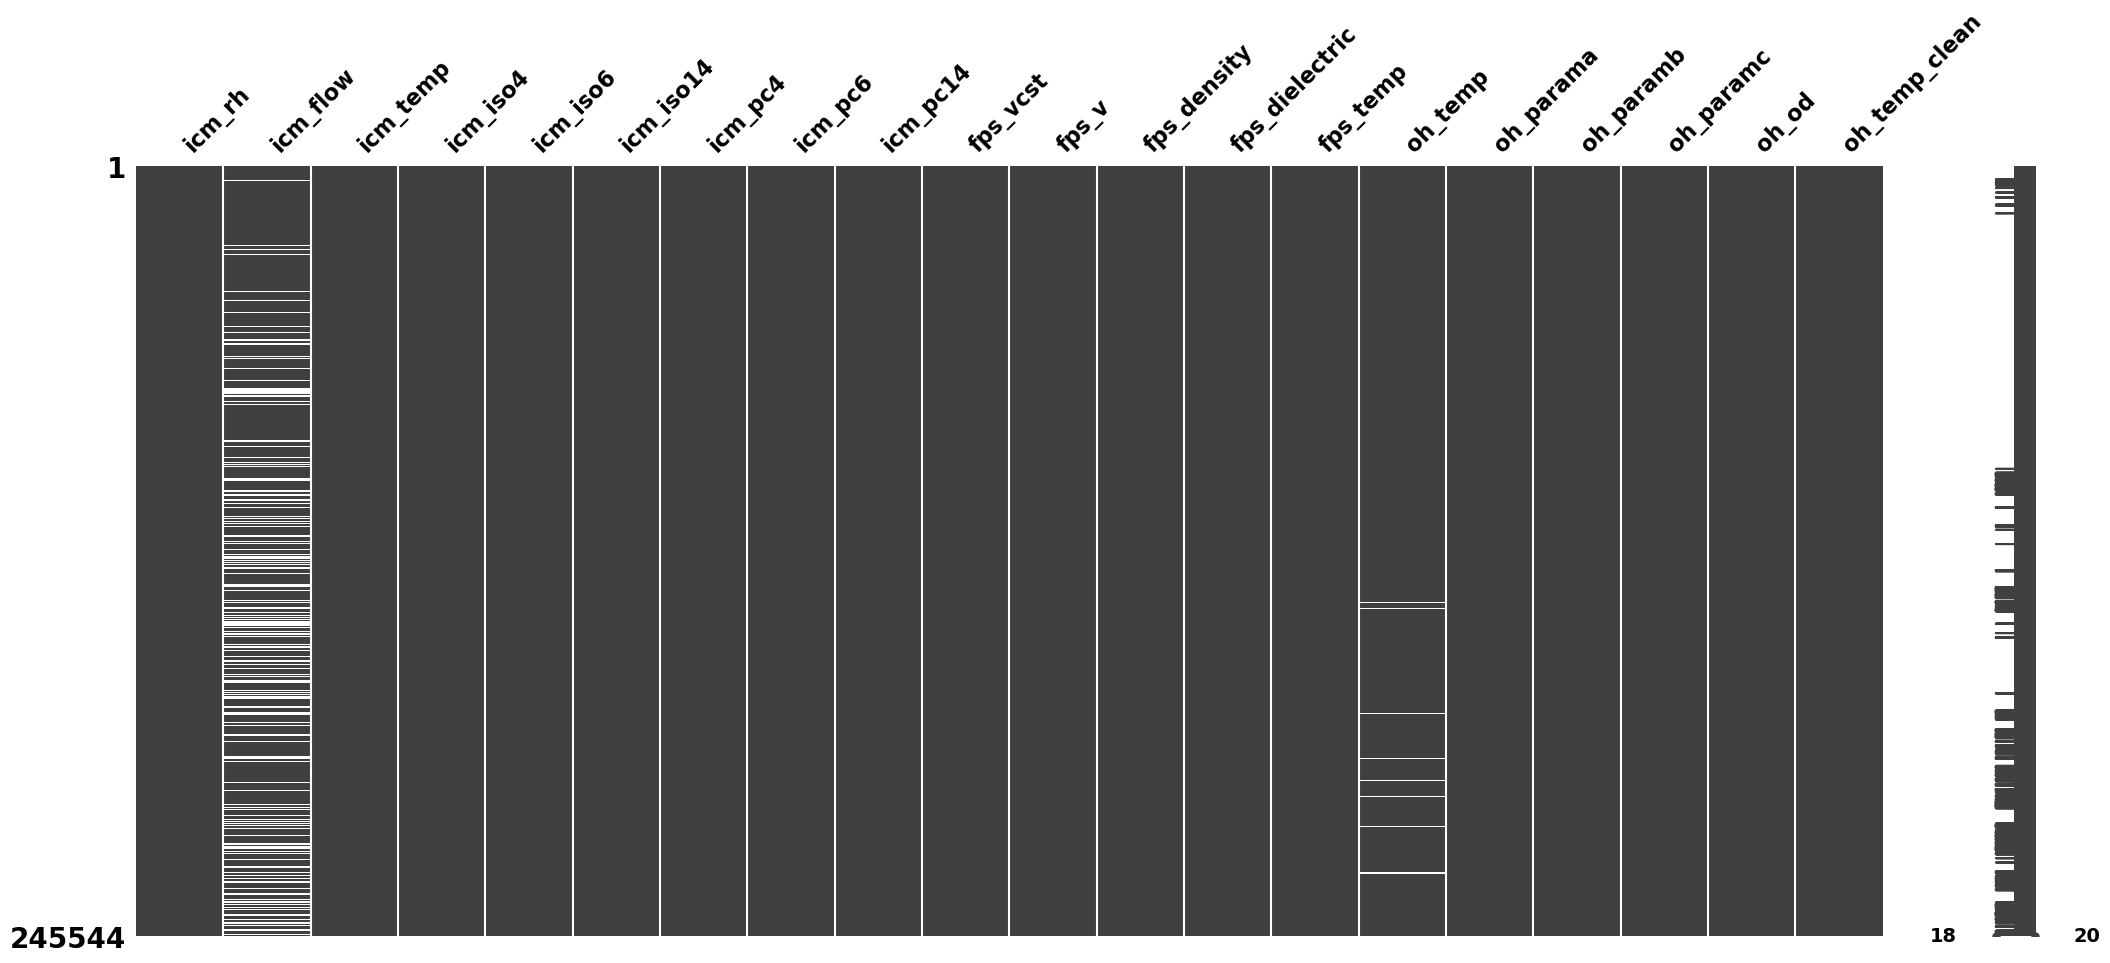

In [30]:
msno.matrix(dataset)

**ToDo:**  icm_flow has 59,392 missing values with correlation with feature variable :-0.369688 , distibuted with mean value of 27.574991  and 26.809585 (non-missing and missing respectively). Furher analysis needed to decide weather to keep/ impute missing values or remove them as per their importance in model.

<h3>1.3 Removing Outliers</h3>

In [31]:
dataset.describe()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean
count,245544.000000,187605.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000,242861.000000,245544.000000,245544.000000,245544.000000,245544.000000,245544.000000
mean,8.960029,351.830426,40.351955,13.827192,10.447981,3.019834,11130.141144,1316.714475,25.352870,115.207646,90.216373,0.780033,2.170328,38.721795,34.794199,27671.001515,36970.612485,21002.383736,27.296683,34.847274
std,2.861359,104.764129,5.694858,0.705746,1.147272,2.572671,6490.661758,1762.808961,189.363447,46.657161,45.396291,0.041136,0.190735,6.270661,6.457013,1307.749468,2034.216267,1476.151233,3.723004,6.463191
min,3.400000,11.000000,25.970000,12.000000,7.000000,0.000000,2287.000000,77.000000,0.000000,69.748000,55.757000,0.041000,2.131000,21.250000,15.000000,25764.000000,34196.000000,18951.000000,18.070000,15.000000
25%,6.820000,278.000000,34.930000,13.000000,10.000000,0.000000,7291.000000,553.000000,0.000000,89.598000,70.497000,0.773000,2.149000,32.844000,29.000000,26758.000000,35523.750000,19917.000000,24.020000,29.000000
50%,8.930000,344.000000,41.380000,14.000000,10.000000,4.000000,9707.000000,982.000000,9.000000,103.941000,81.477000,0.782000,2.161000,39.875000,36.000000,27134.000000,36210.000000,20505.000000,28.790000,36.000000
75%,10.640000,421.000000,45.380000,14.000000,11.000000,5.000000,13554.000000,1655.000000,25.000000,139.063000,107.437000,0.786000,2.181000,44.094000,40.000000,28793.000000,38841.000000,22363.000000,29.880000,40.000000
max,18.220000,971.000000,50.520000,20.000000,19.000000,16.000000,699017.000000,350172.000000,56221.000000,15542.953000,1298.497000,1.985000,7.937000,49.875000,46.000000,30951.000000,41913.000000,24562.000000,32.530000,46.000000


***Possible OutlierS:*** minimum of icm_iso14: 0 and Maximum of icm_pc4  & icm_pc: 699017 and 350172 respectively 

In [32]:
def detect_outlier(feature):
    data = dataset[feature].dropna()  # Remove missing values
    mean = np.mean(data)
    std = np.std(data)

    # Compute z-scores in a vectorized manner
    z_scores = (data - mean) / std
    outliers = data[np.abs(z_scores) > 3]

    # Compute quantiles and count outliers
    q95 = data.quantile(0.95)
    q99 = data.quantile(0.99)
    outliers_95 = data[data > q95]
    outliers_99 = data[data > q99]

    print(f'\nOutlier caps for {feature}:')
    print(f'  --95p: {q95:.1f} / {len(outliers_95)} values exceed that')
    print(f'  --3sd: {mean + 3 * std:.1f} / {len(outliers)} values exceed that')
    print(f'  --99p: {q99:.1f} / {len(outliers_99)} values exceed that')


In [33]:
# Before filtering
print("Before filtering:", dataset.shape)

Before filtering: (245544, 20)


In [34]:
# Determine what the upperbound should be for continuous features
for feat in ['icm_rh','icm_flow', 'icm_temp', 'icm_iso4', 'icm_iso6', 'icm_iso14', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_temp', 'oh_parama', 'oh_paramb', 'oh_paramc', 'oh_od', 'oh_temp_clean']:
    detect_outlier(feat)



Outlier caps for icm_rh:
  --95p: 13.9 / 12253 values exceed that
  --3sd: 17.5 / 465 values exceed that
  --99p: 16.7 / 2413 values exceed that

Outlier caps for icm_flow:
  --95p: 536.0 / 9371 values exceed that
  --3sd: 666.1 / 323 values exceed that
  --99p: 606.0 / 1842 values exceed that

Outlier caps for icm_temp:
  --95p: 48.5 / 12052 values exceed that
  --3sd: 57.4 / 0 values exceed that
  --99p: 49.6 / 2407 values exceed that

Outlier caps for icm_iso4:
  --95p: 15.0 / 1034 values exceed that
  --3sd: 15.9 / 1034 values exceed that
  --99p: 15.0 / 1034 values exceed that

Outlier caps for icm_iso6:
  --95p: 12.0 / 6903 values exceed that
  --3sd: 13.9 / 1007 values exceed that
  --99p: 13.0 / 857 values exceed that

Outlier caps for icm_iso14:
  --95p: 7.0 / 5343 values exceed that
  --3sd: 10.7 / 326 values exceed that
  --99p: 9.0 / 1348 values exceed that

Outlier caps for icm_pc4:
  --95p: 21266.8 / 12278 values exceed that
  --3sd: 30602.1 / 1327 values exceed that
  -

***ObservatioN:*** we have 6525  values exceeding the 3sd cap across all features , capping them might make our model work better but as we already removed 5.5% of data. so we will only remove the most extreme values for now we saw earlier i.e., Maximum of icm_pc4 & icm_pc: 699017 and 350172 respectively.

In [35]:
dataset=dataset[~((dataset['icm_pc4'] > 250000) | (dataset['icm_pc6'] > 100000))]

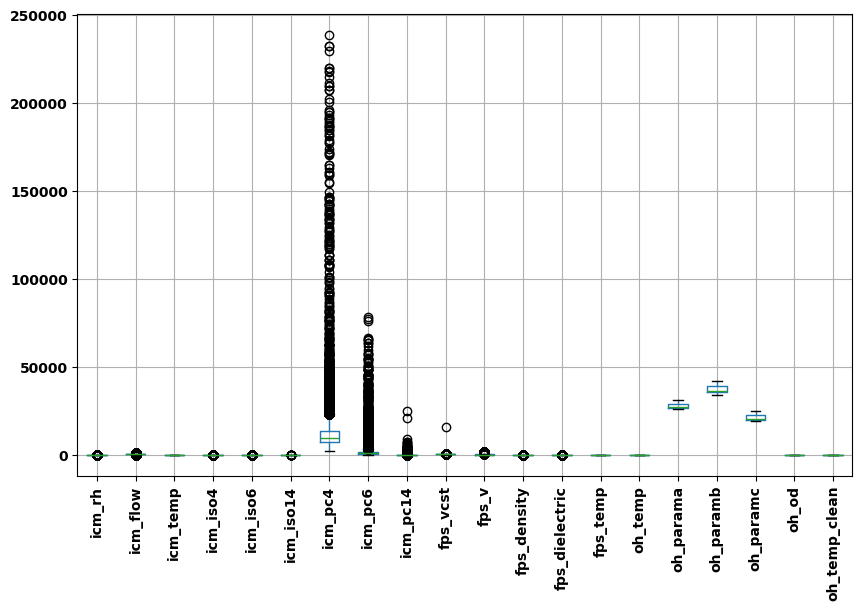

After filtering: (245535, 20)


In [36]:
# Now plot the boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dataset.boxplot(rot=90)
plt.show()
# After filtering
print("After filtering:", dataset.shape)


***ObservatioN:*** We have removed total of 13,102 rows, around 5.07% from original dataset while cleaning

<h3>1.4 Transform Skewed Features </h3>

In [37]:
#importing libraries
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

dataset.head()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean
0,11.38,140.0,32.88,15,13,4,19932,4662,10,654.309,1298.497,1.985,7.937,30.312,27.0,27501,36368,20349,28.05,27.0
1,11.38,284.0,32.93,15,10,5,21560,857,30,654.309,1298.497,1.985,7.937,30.312,27.0,27477,36334,20345,28.11,27.0
2,11.38,283.0,32.97,15,12,4,18156,2235,15,654.309,1298.497,1.985,7.937,30.437,27.0,27477,36333,20342,28.11,27.0
3,11.30,339.0,33.02,15,11,4,18512,1305,9,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0
4,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,1298.497,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0


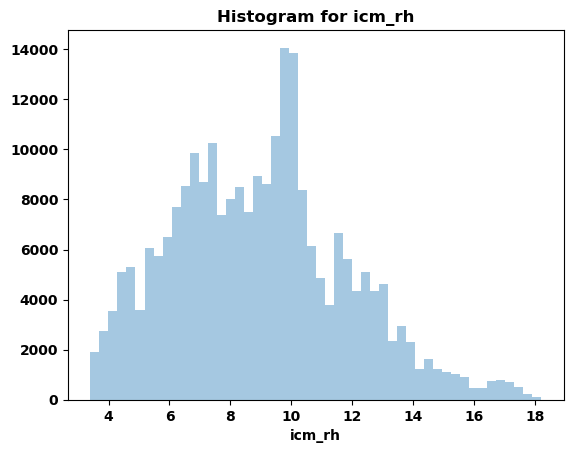

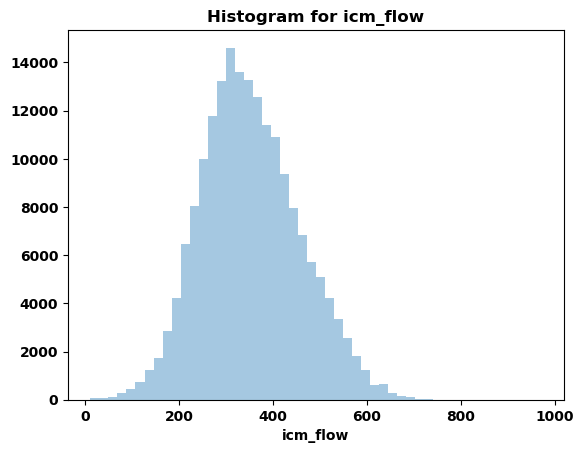

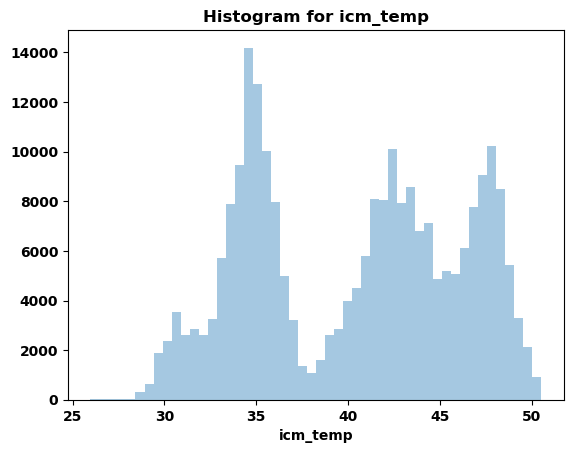

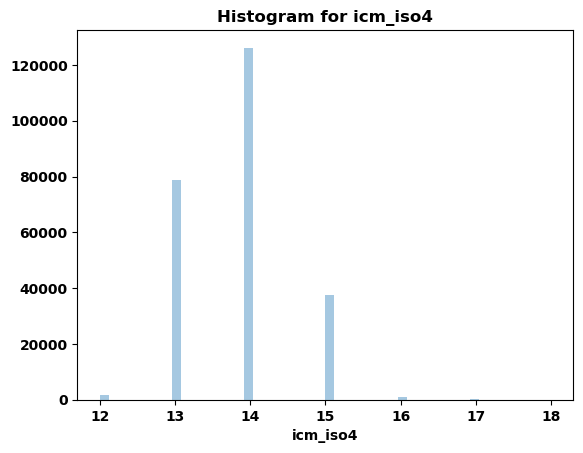

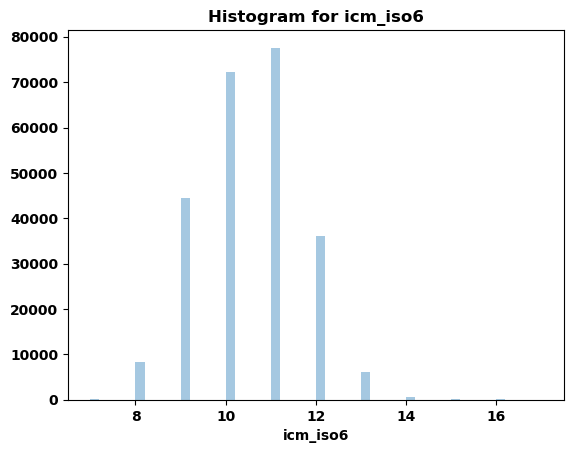

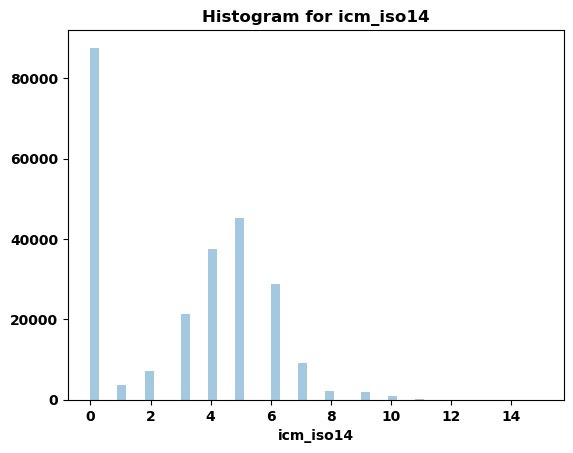

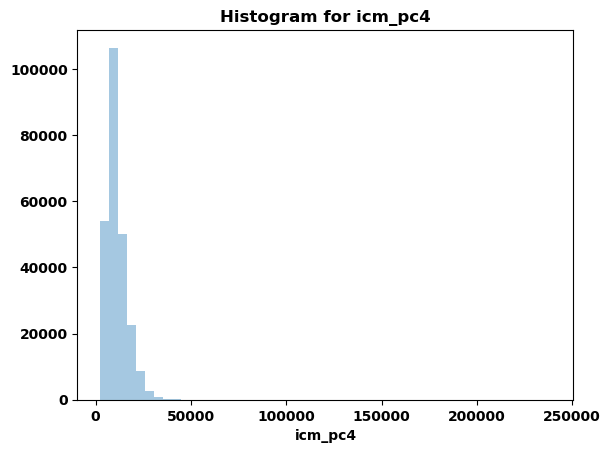

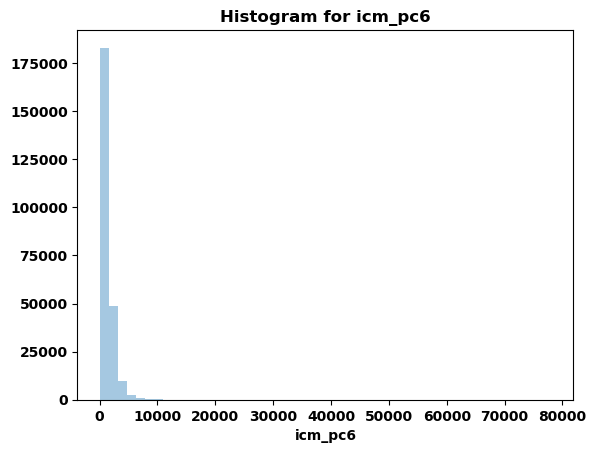

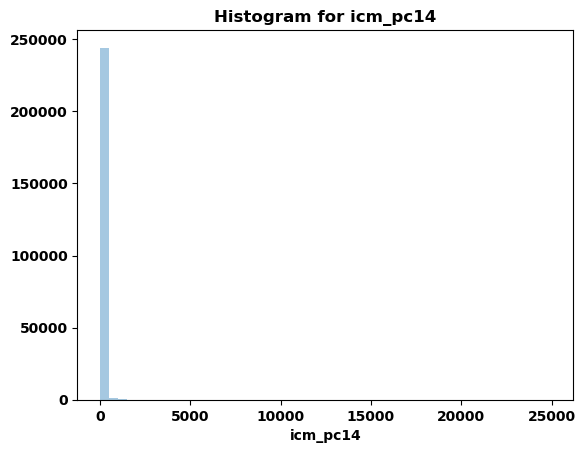

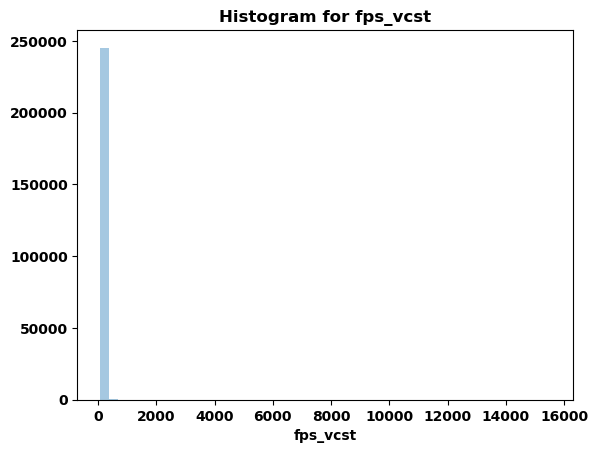

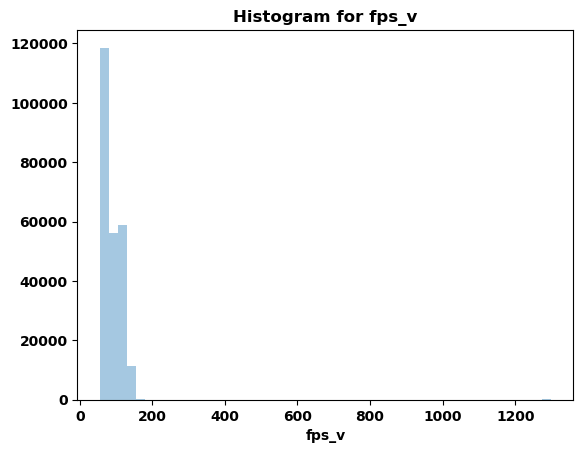

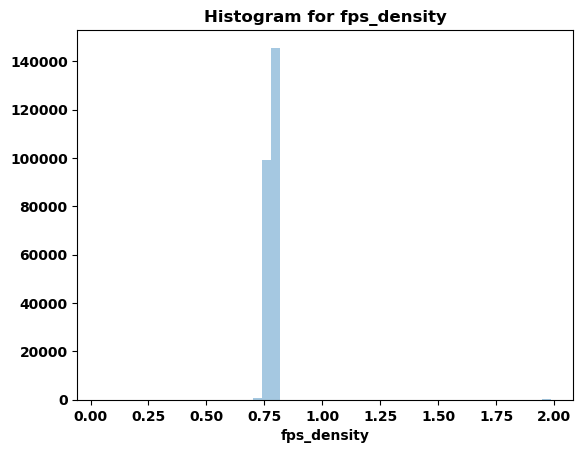

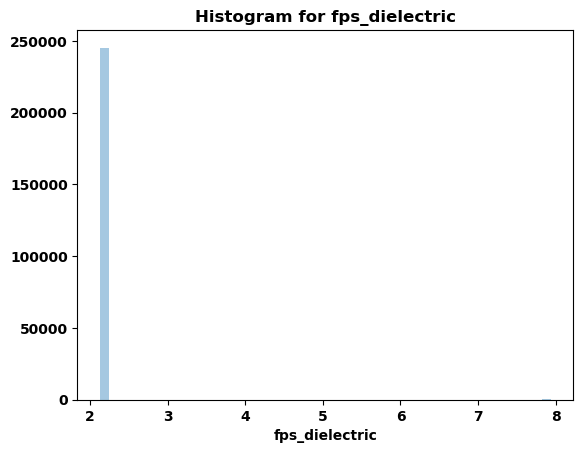

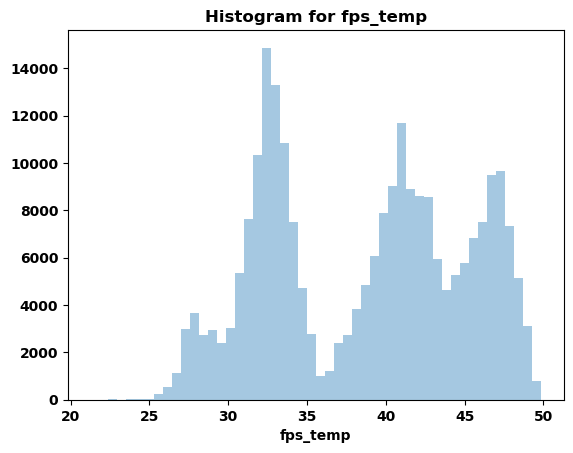

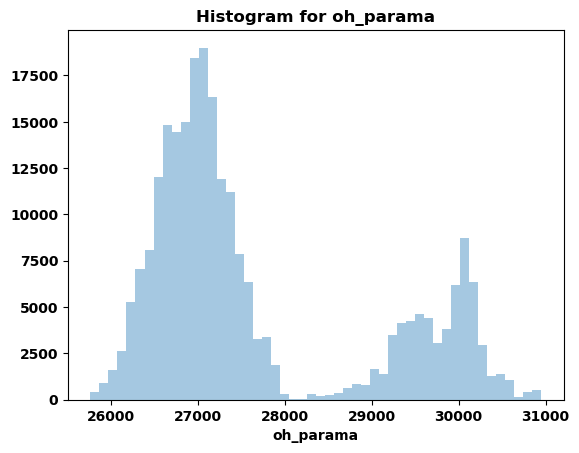

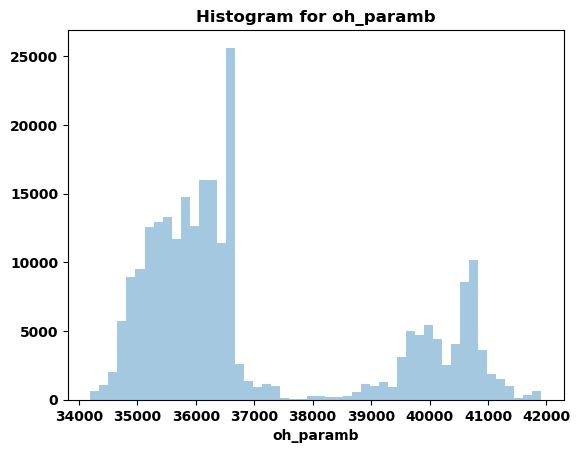

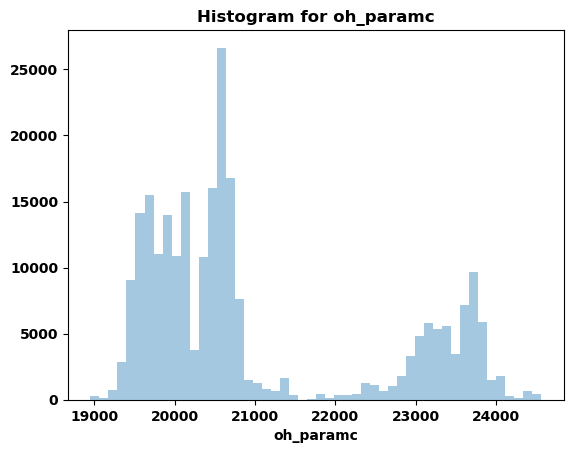

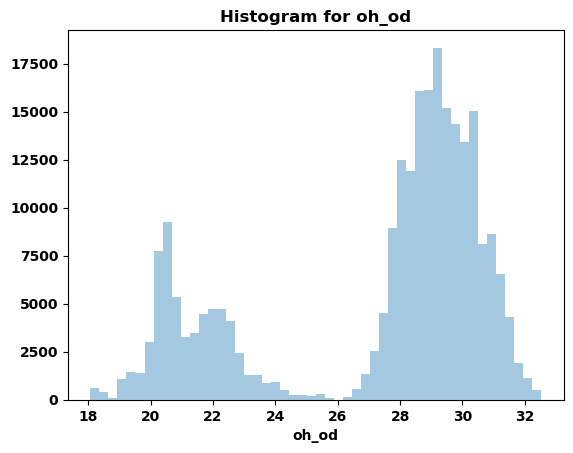

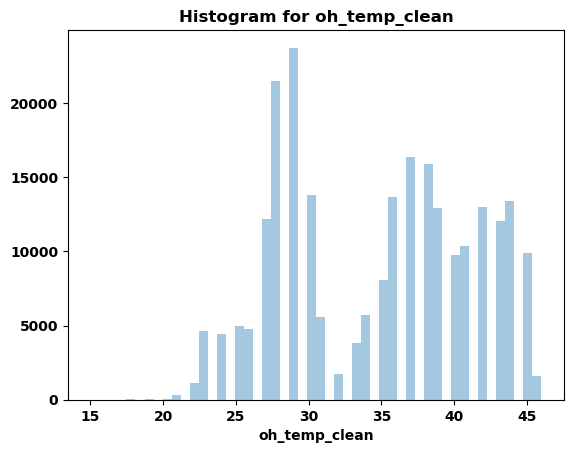

In [38]:
# seeing distribution of all feature and their skewness
for feature in ['icm_rh','icm_flow', 'icm_temp', 'icm_iso4', 'icm_iso6', 'icm_iso14', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_parama', 'oh_paramb', 'oh_paramc', 'oh_od', 'oh_temp_clean']:
    sns.distplot(dataset[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

In [39]:
#looking back at missing icm_flow data
dataset.groupby(dataset['icm_flow'].isnull())['oh_od'].mean()

icm_flow
False    27.469107
True     26.738383
Name: oh_od, dtype: float64

***ObservatioN:*** we can't create indicator feature based on icm_flow as it doesnot affect our target variable much

<h3>1.5 Combine Existing Features Into New Feature </h3>


In [40]:
dataset['Final_Param'] = dataset['oh_parama'] + dataset['oh_paramb'] + dataset['oh_paramc']
dataset.head()

,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,...,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean,Final_Param
0,11.38,140.0,32.88,15,13,4,19932,4662,10,654.309,...,1.985,7.937,30.312,27.0,27501,36368,20349,28.05,27.0,84218
1,11.38,284.0,32.93,15,10,5,21560,857,30,654.309,...,1.985,7.937,30.312,27.0,27477,36334,20345,28.11,27.0,84156
2,11.38,283.0,32.97,15,12,4,18156,2235,15,654.309,...,1.985,7.937,30.437,27.0,27477,36333,20342,28.11,27.0,84152
3,11.30,339.0,33.02,15,11,4,18512,1305,9,654.309,...,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0,84163
4,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,...,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0,84163


<h2>2. Preparing Feature for Model</h2>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset.head()


,icm_rh,icm_flow,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,...,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean,Final_Param
0,11.38,140.0,32.88,15,13,4,19932,4662,10,654.309,...,1.985,7.937,30.312,27.0,27501,36368,20349,28.05,27.0,84218
1,11.38,284.0,32.93,15,10,5,21560,857,30,654.309,...,1.985,7.937,30.312,27.0,27477,36334,20345,28.11,27.0,84156
2,11.38,283.0,32.97,15,12,4,18156,2235,15,654.309,...,1.985,7.937,30.437,27.0,27477,36333,20342,28.11,27.0,84152
3,11.30,339.0,33.02,15,11,4,18512,1305,9,654.309,...,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0,84163
4,11.31,NaN,33.06,16,12,6,32408,3027,45,654.309,...,1.985,7.937,30.500,27.0,27472,36338,20353,28.12,27.0,84163


<h3>2.1 Splitting data</h3>

In [42]:
# this is our complete data set with all of our raw, clean and created features.  
features = dataset.drop(['icm_flow'], axis=1)
labels = dataset['oh_od']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,icm_rh,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean,Final_Param
127646,10.01,40.29,13,8,0,6115,208,0,109.479,85.597,0.782,2.164,38.437,35.0,27519,36595,20761,27.80,35.0,84875
228052,13.43,47.00,13,8,0,5016,161,0,85.381,67.017,0.785,2.143,45.719,42.0,29864,40355,23437,21.06,42.0,93656
131826,9.15,40.95,14,11,0,9163,1899,0,102.880,81.097,0.788,2.163,39.344,36.0,27346,36536,20659,28.19,36.0,84541
131862,9.22,40.88,13,10,2,7765,911,3,104.789,82.337,0.786,2.163,39.406,36.0,27347,36542,20660,28.18,36.0,84549
148200,7.25,39.02,14,10,5,13739,511,21,112.244,88.157,0.785,2.167,37.375,33.0,26773,35735,20221,29.73,33.0,82729


In [43]:
for dataset1 in [y_train, y_val, y_test]:
    print(round(len(dataset1) / len(labels), 2))

0.6
0.2
0.2


<h3>2.2 Standardize Features</h3>

In [44]:
from sklearn.preprocessing import StandardScaler

dataset_train = X_train
dataset_val = X_val
dataset_test = X_test
dataset_train.head()

,icm_rh,icm_temp,icm_iso4,icm_iso6,icm_iso14,icm_pc4,icm_pc6,icm_pc14,fps_vcst,fps_v,fps_density,fps_dielectric,fps_temp,oh_temp,oh_parama,oh_paramb,oh_paramc,oh_od,oh_temp_clean,Final_Param
127646,10.01,40.29,13,8,0,6115,208,0,109.479,85.597,0.782,2.164,38.437,35.0,27519,36595,20761,27.80,35.0,84875
228052,13.43,47.00,13,8,0,5016,161,0,85.381,67.017,0.785,2.143,45.719,42.0,29864,40355,23437,21.06,42.0,93656
131826,9.15,40.95,14,11,0,9163,1899,0,102.880,81.097,0.788,2.163,39.344,36.0,27346,36536,20659,28.19,36.0,84541
131862,9.22,40.88,13,10,2,7765,911,3,104.789,82.337,0.786,2.163,39.406,36.0,27347,36542,20660,28.18,36.0,84549
148200,7.25,39.02,14,10,5,13739,511,21,112.244,88.157,0.785,2.167,37.375,33.0,26773,35735,20221,29.73,33.0,82729


In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(dataset_train)

# Scale the training, validation, and test sets using the same scaler
dataset_train[features] = scaler.transform(dataset_train[features])
dataset_val[features] = scaler.transform(dataset_val[features])
dataset_test[features] = scaler.transform(dataset_test[features])

# Check the transformed data
dataset_val.head()


ValueError: Boolean array expected for the condition, not float64

<h3>2.3 Write out datasets</h3>

In [ ]:
# Defining the list of features to be used for each dataset
cleaned_original_features = ['icm_rh', 'icm_temp', 'icm_iso4', 'icm_iso6', 'icm_iso14', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_temp_clean']

all_features = ['icm_rh', 'icm_temp', 'icm_iso4', 'icm_iso6', 'icm_iso14', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_temp_clean']

reduced_features = ['icm_rh', 'icm_temp', 'icm_iso4', 'icm_iso6', 'icm_iso14', 'icm_pc4', 'icm_pc6', 'icm_pc14', 'fps_vcst', 'fps_v', 'fps_density', 'fps_dielectric', 'fps_temp', 'oh_temp_clean']

In [ ]:
# Write out final data for each feature set

dataset_train[cleaned_original_features].to_csv('data/train_features_original.csv', index=False)
dataset_val[cleaned_original_features].to_csv('data/val_features_original.csv', index=False)
dataset_test[cleaned_original_features].to_csv('data/test_features_original.csv', index=False)

dataset_train[all_features].to_csv('data/train_features_all.csv', index=False)
dataset_val[all_features].to_csv('data/val_features_all.csv', index=False)
dataset_test[all_features].to_csv('data/test_features_all.csv', index=False)

dataset_train[reduced_features].to_csv('data/train_features_reduced.csv', index=False)
dataset_val[reduced_features].to_csv('data/val_features_reduced.csv', index=False)
dataset_test[reduced_features].to_csv('data/test_features_reduced.csv', index=False)


<h3>2.4 Move Labels To Proper Directory</h3>

In [ ]:
# Extracting the already scaled target variable as labels
dataset_train_labels = dataset_train['oh_od'].reset_index(drop=True)
dataset_val_labels = dataset_val['oh_od'].reset_index(drop=True)
dataset_test_labels = dataset_test['oh_od'].reset_index(drop=True)

# Write out labels to final directory
dataset_train_labels.to_csv('data/train_labels.csv', index=False)
dataset_val_labels.to_csv('data/val_labels.csv', index=False)
dataset_test_labels.to_csv('data/test_labels.csv', index=False)

In [ ]:
# Checking the length of the extracted label datasets
print("Length of dataset_train_labels:", len(dataset_train_labels))
print("Length of dataset_val_labels:", len(dataset_val_labels))
print("Length of dataset_test_labels:", len(dataset_test_labels))
